# Définition du problème

Rosstomn est une des plus longues chaines de pharmancie en Allemangne, avec des opérations à travers l'Europe.

Fin 2018, elle comptais 3900 boutiques en Europe avec un chiffre d'affaire 9 milliard.

Notre travail ici consiste à prédire les ventes d'une boutique donnée à une date donnée.

# Le Business Problem
 Utilisation de modèle SCQ de Mu Sigma Inc.
 * Current Situation : L'équipe marketing de Rossman souhaite concevoir des campagnes promotionnelles pour les clients des magasins et ainsi augmenter les ventes. 
Le manque de visibilité sur les ventes futures des magasins rend la conception de la campagne compliquée et moins efficace pour les magasins dont les performances sont attendues
   
 * Complication : L'équipe ne dispose pas des outils nécessaires pour étudier et estimer les futures ventes en magasin.
 * Question : Comment pouvons-nous estimer les ventes futures d’un magasin ? Quelle est la précision de l’estimation ?
 * Desired feature  state L'équipe marketing et promotions dispose désormais des moyens de prévoir avec précision les ventes des magasins requis et donc de concevoir des campagnes promotionnelles basées sur les performances attendues du magasin pour augmenter les ventes globales.: 

# Lecture des données

In [1]:
import pandas as pd

In [2]:
df1 = pd.read_csv("./dataset/train.csv", low_memory=False,parse_dates=["Date"])
df2 = pd.read_csv("./dataset/store.csv")

## 1. Description des données

In [28]:
# taille du dataset des ventes
df1.shape

(1017209, 9)

In [23]:
# taille du dataset des boutiques
df2.shape

(1115, 10)

In [3]:
# Fusion des des données de vente et celles concernant les différentes boutiques
df = df1.merge(df2, on=["Store"], how = "inner")

In [31]:
df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

# Importons les librairies nécessaires

In [4]:
import numpy as np
import matplotlib.pylab as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

## Aperçu du dataset

In [9]:
print(" Forme avant la suppression des doublons : ", df.shape) 
df.drop_duplicates(inplace=True)
print("\n Forme après suppression : ", df.shape)

 Forme avant la suppression des doublons :  (1017209, 18)

 Forme après suppression :  (1017209, 18)


In [34]:
print(" Base d'examples : \n ")
df.head(20)

 Base d'examples : 
 


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
5,1,7,2015-07-26,0,0,0,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
6,1,6,2015-07-25,4364,500,1,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
7,1,5,2015-07-24,3706,459,1,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
8,1,4,2015-07-23,3769,503,1,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
9,1,3,2015-07-22,3464,463,1,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [38]:
print(" Nombre total de boutiques : ", len(df["Store"].unique()))
print(" Nombre de jours des ventes actuelles : ", len(df["Date"].unique()))
print(" Nombre moyen des ventes jornalières : ", df["Sales"].mean())

 Nombre total de boutiques :  1115
 Nombre de jours des ventes actuelles :  942
 Nombre moyen des ventes jornalières :  5773.818972305593


# Les types de données

In [39]:
df.dtypes

Store                                 int64
DayOfWeek                             int64
Date                         datetime64[ns]
Sales                                 int64
Customers                             int64
Open                                  int64
Promo                                 int64
StateHoliday                         object
SchoolHoliday                         int64
StoreType                            object
Assortment                           object
CompetitionDistance                 float64
CompetitionOpenSinceMonth           float64
CompetitionOpenSinceYear            float64
Promo2                                int64
Promo2SinceWeek                     float64
Promo2SinceYear                     float64
PromoInterval                        object
dtype: object

* Voyons s'il y a une différence significative des ventes selon le jour de la semaine

In [6]:
df.DayOfWeek.value_counts()

DayOfWeek
5    145845
4    145845
3    145665
2    145664
1    144730
7    144730
6    144730
Name: count, dtype: int64

* Le jour n'influence pas la vente ( car toujours autoure de 145700 )



Allons plus en détail en voyant la semaine, le mois, semestre, ...

In [5]:
# Création d'autres variables
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)

df['Day'] = df['Date'].dt.day
df['Week'] = df['Date'].dt.isocalendar().week
df['Month'] = df['Date'].dt.month
df['Quarter'] = df['Date'].dt.quarter
df['Year'] = df['Date'].dt.year
df['Season'] = np.where(df["Month"].isin([3,4,5]),"Spring",
                 np.where(df["Month"].isin([6,7,8]), "Summer",
                   np.where(df["Month"].isin ([9,10,11]),"Fall",
                     np.where(df["Month"].isin([12,1,2]),"Winter","None"))
                         )
                       )

In [27]:
# Un coup d'oeil sur les nouvelles colonnes

df[["Day","Week", "Month", "Quarter", "Year", "Season"]].head(10)

,Day,Week,Month,Quarter,Year,Season
0,31,31,7,3,2015,Summer
1,30,31,7,3,2015,Summer
2,29,31,7,3,2015,Summer
3,28,31,7,3,2015,Summer
4,27,31,7,3,2015,Summer
5,26,30,7,3,2015,Summer
6,25,30,7,3,2015,Summer
7,24,30,7,3,2015,Summer
8,23,30,7,3,2015,Summer
9,22,30,7,3,2015,Summer


# Détermination du type de problème Machine Learning
* Variable cible : Sales ( continu)
* Variables indépendantes : 'Store', 'DayOfWeek', 'Date', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Day', 'Week', 'Month', 'Quarter',
       'Year', 'S'inue.
Quarter
Year
Season

# Sur la base de l'énoncé du problème, nous comprenons que nous devons créer un modèle de régression ML supervisé,car la variable cible(mpg) est continue.

# Examination de la distribution de la variable cible 
 Création d'un histogramme car la variable cible est continue 
 Cela nous aidera à comprendre la distribution des valeurs

<Axes: >

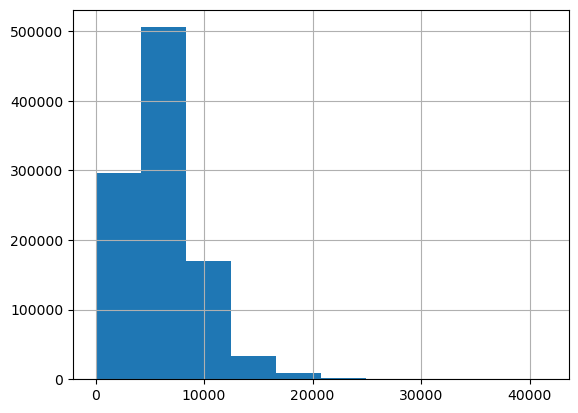

In [35]:
df['Sales'].hist()

La distribution des données de la variable cible est satisfaisante pour aller plus loin. 
Il existe un nombre suffisant de lignes pour chaque type de valeurs à partir desquelles apprendre.


# Exploration basique des données 
* Observer les informations résumées des données 
* Types de données, valeurs manquantes basées sur le nombre de valeurs 
        non nulles par rapport au nombre total de lignes, etc. 
* Supprimer les variables des données qui ont trop de valeurs manquantes (valeurs manquantes > 30%) 
* Supprimer les variables qualitatives qui ne peut pas être utilisées dans Machine Learning

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 24 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1014567 no

In [59]:
# Voyons les statistiques descriptives des données 
round(df.drop(['Date'], axis=1).describe(), 3) #.plot(figsize= (10,10))

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Day,Week,Month,Quarter,Year
count,1017209.000,1017209.000,1017209.000,1017209.000,1017209.000,1017209.000,1017209.000,1014567.000,693861.000,693861.000,1017209.000,509178.000,509178.000,1017209.000,1017209.0,1017209.000,1017209.000,1017209.000
mean,558.430,3.998,5773.819,633.146,0.830,0.382,0.179,5430.086,7.223,2008.690,0.501,23.269,2011.753,15.703,23.616,5.847,2.294,2013.832
std,321.909,1.997,3849.926,464.412,0.376,0.486,0.383,7715.324,3.212,5.993,0.500,14.096,1.663,8.788,14.433,3.326,1.082,0.777
min,1.000,1.000,0.000,0.000,0.000,0.000,0.000,20.000,1.000,1900.000,0.000,1.000,2009.000,1.000,1.0,1.000,1.000,2013.000
25%,280.000,2.000,3727.000,405.000,1.000,0.000,0.000,710.000,4.000,2006.000,0.000,13.000,2011.000,8.000,11.0,3.000,1.000,2013.000
50%,558.000,4.000,5744.000,609.000,1.000,0.000,0.000,2330.000,8.000,2010.000,1.000,22.000,2012.000,16.000,22.0,6.000,2.000,2014.000
75%,838.000,6.000,7856.000,837.000,1.000,1.000,0.000,6890.000,10.000,2013.000,1.000,37.000,2013.000,23.000,35.0,8.000,3.000,2014.000
max,1115.000,7.000,41551.000,7388.000,1.000,1.000,1.000,75860.000,12.000,2015.000,1.000,50.000,2015.000,31.000,52.0,12.000,4.000,2015.000


In [63]:
df.drop(['Date'],axis=1).describe(include = 'object')

,StateHoliday,StoreType,Assortment,PromoInterval,Season
count,1017209,1017209,1017209,509178,1017209
unique,4,4,3,3,4
top,0,a,a,"Jan,Apr,Jul,Oct",Spring
freq,986159,551627,537445,293122,307740


In [60]:
df.nunique()

Store                         1115
DayOfWeek                        7
Date                           942
Sales                        21734
Customers                     4086
Open                             2
Promo                            2
StateHoliday                     4
SchoolHoliday                    2
StoreType                        4
Assortment                       3
CompetitionDistance            654
CompetitionOpenSinceMonth       12
CompetitionOpenSinceYear        23
Promo2                           2
Promo2SinceWeek                 24
Promo2SinceYear                  7
PromoInterval                    3
Day                             31
Week                            52
Month                           12
Quarter                          4
Year                             3
Season                           4
dtype: int64

Type 


# Suppression des colonnes inutiles des données
Pour le moment, nous ne pouvons vraiment pas décider


# Analyse de données exploratoire visuelle 
    Variables catégorielles : diagramme à barres
    Variables continues : Histogramme



array([[<Axes: title={'center': 'Store'}>,
        <Axes: title={'center': 'DayOfWeek'}>,
        <Axes: title={'center': 'Date'}>,
        <Axes: title={'center': 'Sales'}>],
       [<Axes: title={'center': 'Customers'}>,
        <Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'Promo'}>,
        <Axes: title={'center': 'SchoolHoliday'}>],
       [<Axes: title={'center': 'CompetitionDistance'}>,
        <Axes: title={'center': 'CompetitionOpenSinceMonth'}>,
        <Axes: title={'center': 'CompetitionOpenSinceYear'}>,
        <Axes: title={'center': 'Promo2'}>],
       [<Axes: title={'center': 'Promo2SinceWeek'}>,
        <Axes: title={'center': 'Promo2SinceYear'}>,
        <Axes: title={'center': 'Day'}>,
        <Axes: title={'center': 'Week'}>],
       [<Axes: title={'center': 'Month'}>,
        <Axes: title={'center': 'Quarter'}>,
        <Axes: title={'center': 'Year'}>, <Axes: >]], dtype=object)

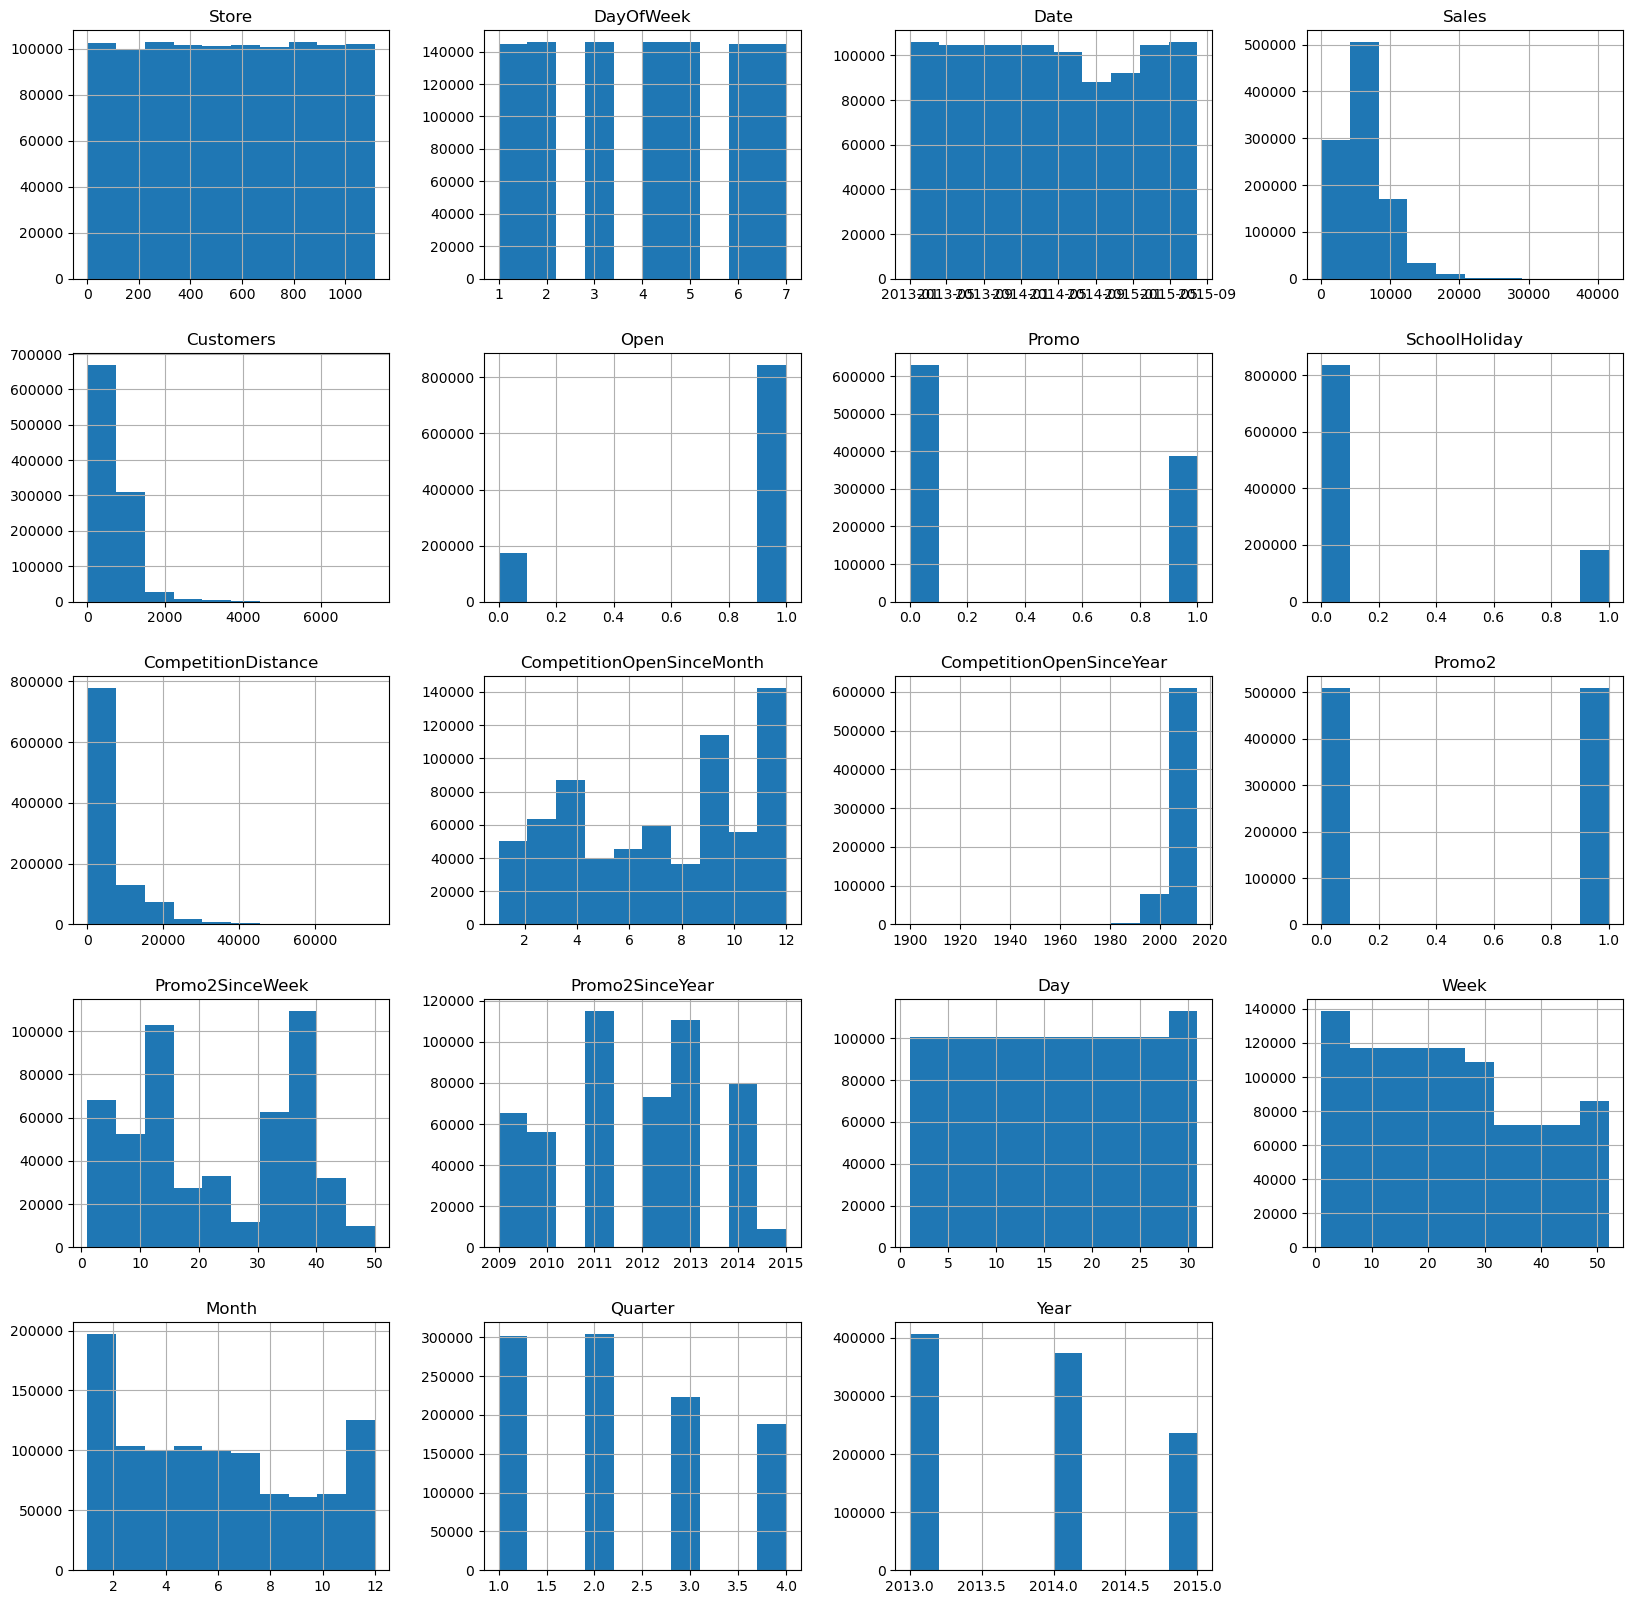

In [67]:
df.hist(figsize=(20,20))

In [85]:
# Fonction pour afficher d'un coup plusieurs diagrammes de barre
def PlotBarCharts(inpData, colsToPlot):
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(15,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

In [102]:
cols = df.select_dtypes(include=['object']).columns

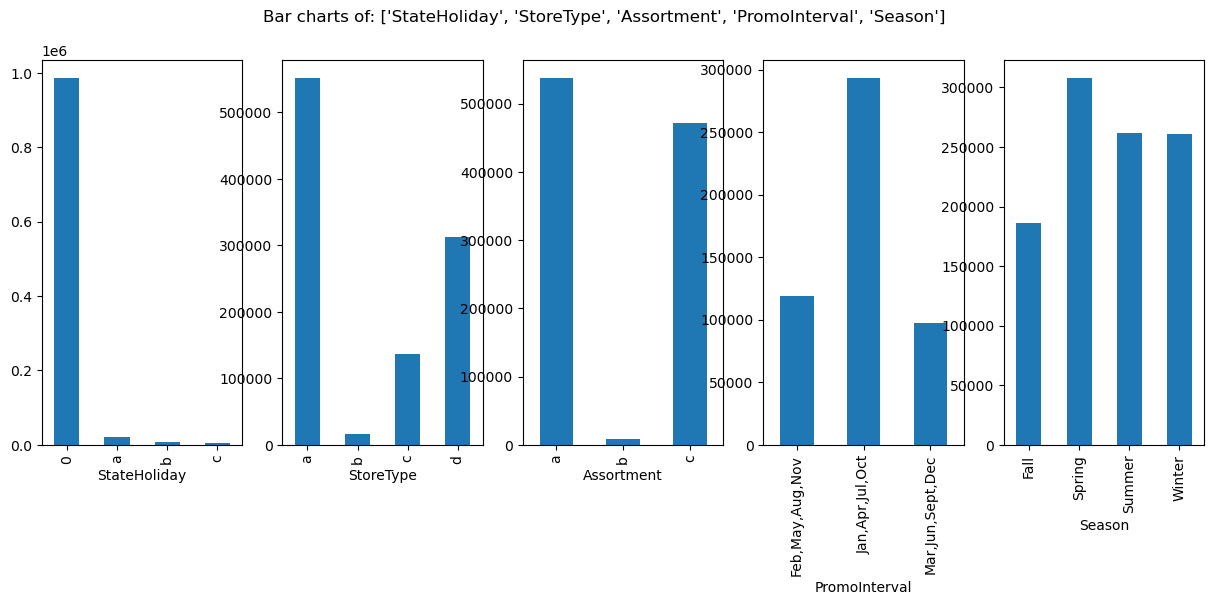

In [103]:
PlotBarCharts(inpData=df, colsToPlot=cols.tolist())

# Traitement des valeurs manquantes
    __Option 1 : supprimez les enregistrements manquants. Seulement s'il n'y a que quelques lignes perdues.
    __Option 2 : Imputer les valeurs aberrantes avec une valeur métier logique

In [92]:
df.isna().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
Day                               0
Week                              0
Month                             0
Quarter                           0
Year                              0
Season                            0
dtype: int64

In [91]:
df.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
Day                               0
Week                              0
Month                             0
Quarter                           0
Year                              0
Season                            0
dtype: int64

In [105]:
df.columns[df.isnull().any()].tolist()

['CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2SinceWeek',
 'Promo2SinceYear',
 'PromoInterval']

In [104]:
# Les colonnes ayant des valeurs manquantes
df[df.columns[df.isnull().any()].tolist()]

,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1270.0,9.0,2008.0,NaN,NaN,NaN
1,1270.0,9.0,2008.0,NaN,NaN,NaN
2,1270.0,9.0,2008.0,NaN,NaN,NaN
3,1270.0,9.0,2008.0,NaN,NaN,NaN
4,1270.0,9.0,2008.0,NaN,NaN,NaN
...,...,...,...,...,...,...
1017204,5350.0,NaN,NaN,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017205,5350.0,NaN,NaN,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017206,5350.0,NaN,NaN,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017207,5350.0,NaN,NaN,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [106]:
# Pourcentage de nombre de valeurs 
df.isnull().sum()/df.shape[0]

Store                        0.000000
DayOfWeek                    0.000000
Date                         0.000000
Sales                        0.000000
Customers                    0.000000
Open                         0.000000
Promo                        0.000000
StateHoliday                 0.000000
SchoolHoliday                0.000000
StoreType                    0.000000
Assortment                   0.000000
CompetitionDistance          0.002597
CompetitionOpenSinceMonth    0.317878
CompetitionOpenSinceYear     0.317878
Promo2                       0.000000
Promo2SinceWeek              0.499436
Promo2SinceYear              0.499436
PromoInterval                0.499436
Day                          0.000000
Week                         0.000000
Month                        0.000000
Quarter                      0.000000
Year                         0.000000
Season                       0.000000
dtype: float64

# Petit réglage
Nous allons faire une interpolation afin de compléter les valeurs manquantes dans la variable CompetitionDistance.
Les autres variables ( CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2SinceWeek,Promo2SinceYear, PromoInterval ) seront supprimées  

In [6]:
df["CompetitionDistance"] = df["CompetitionDistance"].fillna(df["CompetitionDistance"].mode()[0])

In [7]:
df.drop(["CompetitionOpenSinceMonth", "CompetitionOpenSinceYear", "Promo2SinceWeek","Promo2SinceYear", "PromoInterval"], axis=1, inplace= True)

# Data Engineering


Comme nous le savons, les modèles DL ne comprennent que les données numériques.

Pour transformer une colonne catégorielle en une version codée à chaud, pPython fournit le module de prétraitement du package sklearn avec des fonctions 
riches et faciles à utilise

. L'extrait de code suivant transforme la trame de données de 
formation en la forme finale requise pour le développement modèle du

In [8]:
# Définition d'une variable pour chaque type de fonctionnalité
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

target = ["Sales"]
numeric_columns = ["Customers","Open","Promo","Promo2", "StateHoliday","SchoolHoliday","CompetitionDistance"]

categorical_columns = ["DayOfWeek","Quarter","Month","Year", "StoreType","Assortment","Season"]

# Définissons une fonction qui prendra la trame de données brute et le nom de la colonne 
     # et renverra un DF codé à chaud 

def ohEncoder(df, col):
    le = LabelEncoder()
    a=le.fit_transform(df[col]).reshape(-1,1)
    ohe = OneHotEncoder(sparse=False)
    column_names = [col+ "_"+ str(i) for i in le.classes_]
    return(pd.DataFrame(ohe.fit_transform(a),columns =column_names))

In [9]:
# Comme la fonction ci-dessus convertit la colonne une à la fois,
#nous créons une boucle pour créer le dataset final avec toutes les fonctionnalités

temp = df[numeric_columns]
for column in categorical_columns:
    temp_df = ohEncoder(df,column)
    temp = pd.concat([temp,temp_df],axis=1)

In [16]:
print("Shape of Data:",temp.shape)
print("Distinct Datatypes:",temp.dtypes.unique())

Shape of Data: (1017209, 44)
Distinct Datatypes: [dtype('int64') dtype('O') dtype('float64')]


In [10]:
temp["StateHoliday"]= np.where(temp["StateHoliday"]== '0',0,1)

In [29]:
print("Distinct Datatypes:",temp.dtypes.unique())

Distinct Datatypes: [dtype('int64') dtype('int32') dtype('float64')]


Maintenant que nous avons toutes les colonnes sous forme entière, passons à la construction
nos ensembles de données de formation et de test.

Nous allons diviser les 
ensembles de données d'entraînement, de validation et de test dans un rapport de 60:20:20

 Étant donné
que nous disposons d'un ensemble de données de formation assez important, nous réduisons la taille de la 
validation si nécessaire pour conserver la majorité pour la formati
0 : 10.

In [11]:
# Nous allons d’abord créer des ensembles de données d’entraînement et de test avec un ratio de 80 :20. 
# Ensuite, nous utiliserons l'ensemble de données de train pour le diviser davantage en 
# ensembles de données de formation et de validation selon un rapport de 90 : 10.

x_train, x_test, y_train, y_test = train_test_split(temp, df[target],test_size=0.2,random_state=42)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,test_size=0.1,random_state=42)

In [19]:
print("Shape de x_train:",x_train.shape)
print("Shape de x_val:",x_val.shape)
print("Shape de x_test:",x_test.shape)
print("Shape de y_train:",y_train.shape)
print("Shape de y_val:",y_val.shape)
print("Shape de y_test:",y_test.shape)

Shape de x_train: (732390, 44)
Shape de x_val: (81377, 44)
Shape de x_test: (203442, 44)
Shape de y_train: (732390, 1)
Shape de y_val: (81377, 1)
Shape de y_test: (203442, 1)


Les formes de tous les ensembles de données requis semblent être en bon état. 
Maintenant que nous disposons de l'ensemble de données sous la forme requise pour le 
développement et la formation du modèle, nous devons concevoir l'architecture DNN.

# Définition des performances de référence du modèle

Pour définir les performances de base du modèle, nous considérons la moyenne de la 
variable cible dans le dataset d'entraînement comme prédiction pour tous les 
échantillons de test. La métrique que nous utiliserons pour effectuer ce test est la MAE 
(erreur absolue moyenne).

# Conception du Réseau de neurons profonds

In [12]:
# Créons une architecture simple de réseau neuronal profond

from keras.models import Sequential
from keras.layers import Dense, Dropout

In [19]:
model = Sequential()
model.add(Dense(150,input_dim = 44,activation="relu")) # Le input_dim = 44 car nous avons 44 colonnes
model.add(Dense(1,activation = "linear"))

In [ ]:
#Configuration de modèle
model.compile(optimizer='adam',loss="mean_absolute_error",metrics=["mean_absolute_error"])


In [33]:
__train = np.asarray(x_train.values).astype(np.float32)
__train

array([[9.790e+02, 1.000e+00, 0.000e+00, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [1.208e+03, 1.000e+00, 1.000e+00, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [1.064e+03, 1.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       ...,
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [3.370e+02, 1.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [1.117e+03, 1.000e+00, 1.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00]], dtype=float32)

In [34]:

#Train du modèle

model.fit(x_train,y_train.values, validation_data=(x_val,y_val),epochs=10,batch_size=64)

Epoch 1/10
11444/11444 [==============================] - 36s 3ms/step - loss: 943.5423 - mean_absolute_error: 943.5423 - val_loss: 820.8766 - val_mean_absolute_error: 820.8766
Epoch 2/10
11444/11444 [==============================] - 33s 3ms/step - loss: 772.9494 - mean_absolute_error: 772.9494 - val_loss: 733.3605 - val_mean_absolute_error: 733.3605
Epoch 3/10
11444/11444 [==============================] - 32s 3ms/step - loss: 736.8436 - mean_absolute_error: 736.8436 - val_loss: 715.6372 - val_mean_absolute_error: 715.6372
Epoch 4/10
11444/11444 [==============================] - 32s 3ms/step - loss: 719.7585 - mean_absolute_error: 719.7585 - val_loss: 718.9854 - val_mean_absolute_error: 718.9854
Epoch 5/10
11444/11444 [==============================] - 31s 3ms/step - loss: 710.1701 - mean_absolute_error: 710.1701 - val_loss: 707.7684 - val_mean_absolute_error: 707.7684
Epoch 6/10
11444/11444 [==============================] - 31s 3ms/step - loss: 704.7437 - mean_absolute_error: 704.

La sortie précédente est présentée au fur et à mesure que le modèle s'entraîne
le DNN. Il prend un lot de 64 échantillons d'apprentissage dans une itération, fait passer 
chaque échantillon à travers le réseau et mesure la métrique de perte que nous avons 
définie.

# Test des performances du modèle

In [35]:
result = model.evaluate(x_test.values,y_test.values)
# Affichage des résultats
for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))

6358/6358 [==============================] - 21s 3ms/step - loss: 676.9362 - mean_absolute_error: 676.9362
Metric  loss : 676.94
Metric  mean_absolute_error : 676.94


# Amélioration du modèle

In [36]:
model = Sequential([
                    Dense(150,input_dim = 44,activation="relu"),
                    Dense(150,activation="relu"),
                    Dense(150,activation="relu"),
                    Dense(1,activation = "linear")
                    ])

model.compile(optimizer='adam',loss="mean_squared_error",metrics=["mean_absolute_error"])

In [37]:
history = model.fit(x_train,y_train, validation_data=(x_val, 
y_val),epochs=10,batch_size=64)

for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))

Epoch 1/10
11444/11444 [==============================] - 50s 4ms/step - loss: 1712018.2500 - mean_absolute_error: 845.2421 - val_loss: 1176885.8750 - val_mean_absolute_error: 715.6766
Epoch 2/10
11444/11444 [==============================] - 46s 4ms/step - loss: 1122718.2500 - mean_absolute_error: 712.0651 - val_loss: 1107620.6250 - val_mean_absolute_error: 702.3276
Epoch 3/10
11444/11444 [==============================] - 45s 4ms/step - loss: 1068015.1250 - mean_absolute_error: 694.6030 - val_loss: 1017225.3750 - val_mean_absolute_error: 678.2047
Epoch 4/10
11444/11444 [==============================] - 46s 4ms/step - loss: 1047232.0000 - mean_absolute_error: 687.7389 - val_loss: 1085861.2500 - val_mean_absolute_error: 698.3300
Epoch 5/10
11444/11444 [==============================] - 47s 4ms/step - loss: 1017606.9375 - mean_absolute_error: 678.9590 - val_loss: 957459.3125 - val_mean_absolute_error: 652.8254
Epoch 6/10
11444/11444 [==============================] - 46s 4ms/step - los

Essayons quelques expériences supplémentaires pour voir si nous pouvons nous 
attendre à des performances encore améliorées.

In [13]:
model = Sequential()
model.add(Dense(150,input_dim = 44,activation="relu"))
model.add(Dense(150,activation="relu"))
model.add(Dense(150,activation="relu"))
model.add(Dense(150,activation="relu"))
model.add(Dense(150,activation="relu"))
model.add(Dense(1,activation = "linear"))

model.compile(optimizer='adam',loss="mean_squared_error",metrics=["mean_absolute_error"])

model.fit(x_train,y_train, validation_data=(x_val,y_val), epochs=15,batch_size=64)

Epoch 1/15
11444/11444 [==============================] - 49s 4ms/step - loss: 1730203.5000 - mean_absolute_error: 854.9730 - val_loss: 1158541.2500 - val_mean_absolute_error: 719.4835
Epoch 2/15
11444/11444 [==============================] - 45s 4ms/step - loss: 1163440.0000 - mean_absolute_error: 724.3613 - val_loss: 1071500.5000 - val_mean_absolute_error: 690.4693
Epoch 3/15
11444/11444 [==============================] - 44s 4ms/step - loss: 1087408.8750 - mean_absolute_error: 699.5328 - val_loss: 1070184.0000 - val_mean_absolute_error: 679.0824
Epoch 4/15
11444/11444 [==============================] - 44s 4ms/step - loss: 1051077.3750 - mean_absolute_error: 688.7332 - val_loss: 985097.8125 - val_mean_absolute_error: 660.8915
Epoch 5/15
11444/11444 [==============================] - 43s 4ms/step - loss: 1021058.9375 - mean_absolute_error: 679.0734 - val_loss: 949846.2500 - val_mean_absolute_error: 655.1287
Epoch 6/15
11444/11444 [==============================] - 44s 4ms/step - loss

In [14]:
result = model.evaluate(x_test,y_test)
for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))

6358/6358 [==============================] - 10s 2ms/step - loss: 930064.6250 - mean_absolute_error: 642.0850
Metric  loss : 930064.62
Metric  mean_absolute_error : 642.09


# Augmentation du nombre de neurones


In [15]:
model = Sequential()
model.add(Dense(350,input_dim = 44,activation="relu"))
model.add(Dense(350,activation="relu"))
model.add(Dense(1,activation = "linear"))
model.compile(optimizer='adam',loss="mean_squared_error",metrics=["mean_absolute_error"])

In [16]:
model.fit(x_train,y_train, validation_data=(x_val,y_val), epochs=15,batch_size=64)

Epoch 1/15
11444/11444 [==============================] - 31s 3ms/step - loss: 1654171.1250 - mean_absolute_error: 841.9488 - val_loss: 1114009.8750 - val_mean_absolute_error: 709.8079
Epoch 2/15
11444/11444 [==============================] - 43s 4ms/step - loss: 1135405.1250 - mean_absolute_error: 719.6364 - val_loss: 1248807.3750 - val_mean_absolute_error: 740.8412
Epoch 3/15
11444/11444 [==============================] - 38s 3ms/step - loss: 1073665.2500 - mean_absolute_error: 697.9321 - val_loss: 1151886.6250 - val_mean_absolute_error: 716.5859
Epoch 4/15
11444/11444 [==============================] - 37s 3ms/step - loss: 1038846.5000 - mean_absolute_error: 685.5645 - val_loss: 1041608.3125 - val_mean_absolute_error: 690.8209
Epoch 5/15
11444/11444 [==============================] - 36s 3ms/step - loss: 1017203.1875 - mean_absolute_error: 678.8898 - val_loss: 1009438.8750 - val_mean_absolute_error: 682.8734
Epoch 6/15
11444/11444 [==============================] - 39s 3ms/step - lo

In [17]:
result = model.evaluate(x_test,y_test)
for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":", str(round(result[i],2)))

6358/6358 [==============================] - 10s 1ms/step - loss: 853636.4375 - mean_absolute_error: 622.0998
Metric  loss : 853636.44
Metric  mean_absolute_error : 622.1


In [18]:
from keras.callbacks import History

In [19]:
history = History()

model = Sequential([
                Dense(350,input_dim = 44,activation="relu"),
                Dense(350,activation="relu"),
                Dense(350,activation="relu"),
                Dense(350,activation="relu"),
                Dense(350,activation="relu"),
                Dense(1,activation = "linear")
        ])

model.compile(optimizer='adam',loss="mean_squared_error",metrics=["mean_absolute_error"])

In [20]:
model.fit(x_train,y_train, validation_data=(x_val,y_val),epochs=15,batch_size=64,callbacks=[history])

Epoch 1/15
11444/11444 [==============================] - 63s 5ms/step - loss: 1642964.0000 - mean_absolute_error: 843.0557 - val_loss: 1866711.3750 - val_mean_absolute_error: 911.6376
Epoch 2/15
11444/11444 [==============================] - 76s 7ms/step - loss: 1163426.1250 - mean_absolute_error: 725.5475 - val_loss: 1200665.2500 - val_mean_absolute_error: 729.7095
Epoch 3/15
11444/11444 [==============================] - 70s 6ms/step - loss: 1096586.0000 - mean_absolute_error: 703.7245 - val_loss: 1055682.8750 - val_mean_absolute_error: 679.0757
Epoch 4/15
11444/11444 [==============================] - 71s 6ms/step - loss: 1054391.8750 - mean_absolute_error: 689.5239 - val_loss: 985238.6875 - val_mean_absolute_error: 658.6341
Epoch 5/15
11444/11444 [==============================] - 64s 6ms/step - loss: 1029103.6250 - mean_absolute_error: 681.6493 - val_loss: 981573.5000 - val_mean_absolute_error: 660.3715
Epoch 6/15
11444/11444 [==============================] - 65s 6ms/step - loss

In [21]:
result = model.evaluate(x_test,y_test)

for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))

6358/6358 [==============================] - 13s 2ms/step - loss: 808231.1875 - mean_absolute_error: 600.4011
Metric  loss : 808231.19
Metric  mean_absolute_error : 600.4


# Tracer de la métrique de perte à travers les époques

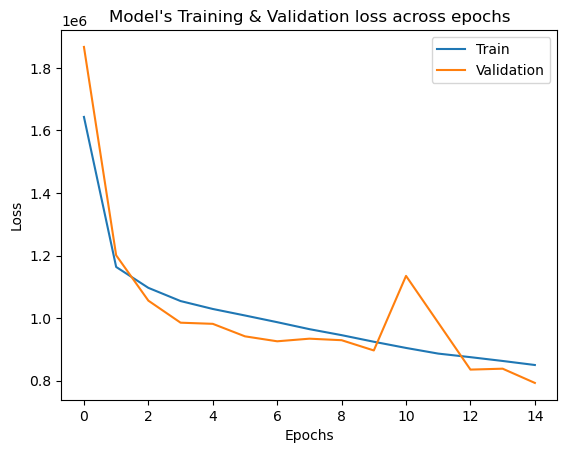

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model's Training & Validation loss across epochs")
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [23]:
# #Prédire manuellement à partir du modèle, au lieu d'utiliser la fonction d'évaluation du modèle

y_test["Prediction"] = model.predict(x_test)
y_test.columns = ["Actual Sales","Predicted Sales"]
print(y_test.head(10))


from sklearn.metrics import mean_squared_error, mean_absolute_error

print("MSE :",mean_squared_error(y_test["Actual Sales"].values,y_test["Predicted Sales"].values))
print("MAE :",mean_absolute_error(y_test["Actual Sales"].values,y_test["Predicted Sales"].values))

        Actual Sales  Predicted Sales
76435              0         0.171777
923026          5548      6338.657227
731180          7467      7359.207031
790350          3360      3964.141602
252134         11414     10263.739258
425310             0         0.171777
666826         14126     11904.504883
881992          6299      6139.238281
783899         10515     12107.301758
540518          7713      8846.811523
MSE : 808232.430260053
MAE : 600.3994099667651
